In [1]:
# !pip install pyjwt==1.6.4
import getCoinInfo

import os
import jwt
import uuid
import hashlib
from urllib.parse import urlencode
import pandas as pd
import matplotlib.pyplot as plt

import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
kor_name_dict = {}

In [3]:
#종목 조회
url = "https://api.upbit.com/v1/market/all"

querystring = {"isDetails":"false"}

response = requests.request("GET", url, params=querystring)

coin_list = response.json()
coins = []
for coin in coin_list:
    if coin['market'].split('-')[0] =='KRW':
        kor_name_dict[coin['market']] = coin['korean_name']
        coins.append(coin['market'])
len(coins)

102

In [4]:
url = "https://api.upbit.com/v1/candles/days"

query = {"count":"1","market": "KRW-BTC"}
# m = hashlib.sha512()
# m.update(urlencode(query).encode())
# query_hash = m.hexdigest()
# payload = {
#     'access_key': accessKey,
#     'nonce': str(uuid.uuid4()),
#     'query_hash': query_hash,
#     'query_hash_alg': 'SHA512'
# }

# jwt_token = jwt.encode(payload, secretKey)
# authorize_token = 'Bearer {}'.format(jwt_token)
# headers = {"Authorization": authorize_token}

response = requests.request("GET", url, params =  query)

print(response.text)

[{"market":"KRW-BTC","candle_date_time_utc":"2021-07-28T00:00:00","candle_date_time_kst":"2021-07-28T09:00:00","opening_price":45447000.00000000,"high_price":46646000.00000000,"low_price":45000000.00000000,"trade_price":46005000.00000000,"timestamp":1627463858307,"candle_acc_trade_price":277154985426.34844000,"candle_acc_trade_volume":6035.60399820,"prev_closing_price":45409000.00000000,"change_price":596000.00000000,"change_rate":0.0131251514}]


In [5]:
from tqdm import tqdm

df = {}
for coin in tqdm(coins):
    df[coin] = getCoinInfo.getCoinDF(coin,30,200,size=24*2*7)
  
df['KRW-BTC']

100%|██████████| 102/102 [00:20<00:00,  5.03it/s]


,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,unit
0,KRW-BTC,2021-07-28T09:00:00,2021-07-28T18:00:00,45864000,46100000,45800000,46005000,2021-07-28 09:17:38.307,3.335166e+09,72.535748,30
1,KRW-BTC,2021-07-28T08:30:00,2021-07-28T17:30:00,45985000,45997000,45700000,45864000,2021-07-28 08:59:59.428,8.000964e+09,174.551404,30
2,KRW-BTC,2021-07-28T08:00:00,2021-07-28T17:00:00,46176000,46300000,45982000,45997000,2021-07-28 08:29:59.207,8.598270e+09,186.406660,30
3,KRW-BTC,2021-07-28T07:30:00,2021-07-28T16:30:00,46135000,46351000,45938000,46178000,2021-07-28 07:59:59.821,1.860833e+10,403.251620,30
4,KRW-BTC,2021-07-28T07:00:00,2021-07-28T16:00:00,45832000,46155000,45832000,46149000,2021-07-28 07:29:59.974,8.956445e+09,194.633866,30
...,...,...,...,...,...,...,...,...,...,...,...
395,KRW-BTC,2021-07-20T04:00:00,2021-07-20T13:00:00,35210000,35335000,35193000,35291000,2021-07-20 04:29:59.945,7.562344e+09,214.533418,30
396,KRW-BTC,2021-07-20T03:30:00,2021-07-20T12:30:00,35306000,35411000,35173000,35207000,2021-07-20 03:59:59.641,1.474798e+10,417.873810,30
397,KRW-BTC,2021-07-20T03:00:00,2021-07-20T12:00:00,35771000,35931000,35285000,35306000,2021-07-20 03:29:59.989,2.205169e+10,620.610862,30
398,KRW-BTC,2021-07-20T02:30:00,2021-07-20T11:30:00,36001000,36037000,35733000,35771000,2021-07-20 02:59:59.691,1.600424e+10,445.519837,30


In [6]:
for coin in coins:
    df[coin] = df[coin].loc[::-1,:]
    df[coin] = df[coin].reset_index()
    df[coin].drop('index',inplace=True,axis=1)

In [7]:
df['KRW-TFUEL']

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,unit
0,KRW-TFUEL,2021-07-20T02:00:00,2021-07-20T11:00:00,301,303,293,296,2021-07-20 02:29:53.068,1.122747e+09,3.760124e+06,30
1,KRW-TFUEL,2021-07-20T02:30:00,2021-07-20T11:30:00,295,295,286,287,2021-07-20 02:59:59.555,1.974552e+09,6.794466e+06,30
2,KRW-TFUEL,2021-07-20T03:00:00,2021-07-20T12:00:00,287,291,278,280,2021-07-20 03:29:59.663,1.729367e+09,6.112967e+06,30
3,KRW-TFUEL,2021-07-20T03:30:00,2021-07-20T12:30:00,280,281,275,278,2021-07-20 03:59:55.644,1.387578e+09,4.986611e+06,30
4,KRW-TFUEL,2021-07-20T04:00:00,2021-07-20T13:00:00,278,282,277,281,2021-07-20 04:29:45.939,5.231139e+08,1.868783e+06,30
...,...,...,...,...,...,...,...,...,...,...,...
395,KRW-TFUEL,2021-07-28T07:00:00,2021-07-28T16:00:00,382,387,381,386,2021-07-28 07:29:52.545,4.447332e+08,1.155169e+06,30
396,KRW-TFUEL,2021-07-28T07:30:00,2021-07-28T16:30:00,385,392,382,383,2021-07-28 07:59:27.317,1.226352e+09,3.162954e+06,30
397,KRW-TFUEL,2021-07-28T08:00:00,2021-07-28T17:00:00,383,386,382,384,2021-07-28 08:29:53.958,4.938809e+08,1.288726e+06,30
398,KRW-TFUEL,2021-07-28T08:30:00,2021-07-28T17:30:00,384,385,380,383,2021-07-28 08:59:31.457,4.799188e+08,1.257755e+06,30


In [8]:
df_tier = pd.DataFrame(columns=['coin','rate','trade_price'])
df_tier['coin'] = coins
df_tier['name'] = df_tier['coin'].map(kor_name_dict)
df_tier['alias'] = df_tier['coin'].str.split('-').str[1]
df_tier.set_index('coin',inplace=True)

In [9]:
for coin in coins:
    df_tier['rate'].loc[coin]= (df[coin]['trade_price'].loc[len(df[coin])-1] - df[coin]['opening_price'].loc[0])/df[coin]['opening_price'].loc[0] * 100
    df_tier['trade_price'].loc[coin] = df[coin]['candle_acc_trade_price'].mean()/pow(10,8)
    df_tier['tier_val'] = 10*df_tier['rate'] + df_tier['trade_price']
df_tier = df_tier.sort_values(by='tier_val',ascending=False)
df_tier[:20]

,rate,trade_price,name,alias,tier_val
coin,,,,,
KRW-AXS,184.680401,366.163767,엑시인피니티,AXS,2212.967782
KRW-SAND,66.597077,81.665778,샌드박스,SAND,747.636551
KRW-DAWN,58.709677,36.170386,던프로토콜,DAWN,623.267161
KRW-STRK,56.720827,54.237704,스트라이크,STRK,621.445976
KRW-GAS,53.422502,30.605375,가스,GAS,564.830394
KRW-ANKR,50.680787,5.931099,앵커,ANKR,512.738966
KRW-KAVA,50.36855,5.545853,카바,KAVA,509.231357
KRW-ELF,50.0,3.771296,엘프,ELF,503.771296
KRW-AQT,47.191011,30.872817,알파쿼크,AQT,502.782929


In [10]:
import sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_tier[['tier_val']])
df_tier['tier'] = kmeans.labels_

tier_dict = {}
tier_num = 0

def getTier(x,tier_dict):
    global tier_num
    if not tier_dict.get(x):
        tier_dict[x] = tier_num
        tier_num+=1
    return tier_dict[x]

df_tier['tier']=df_tier['tier'].map(lambda x : getTier(x,tier_dict))
df_tier = df_tier.sort_values(by='tier')
df_tier[:20]

,rate,trade_price,name,alias,tier_val,tier
coin,,,,,,
KRW-AXS,184.680401,366.163767,엑시인피니티,AXS,2212.967782,0
KRW-SAND,66.597077,81.665778,샌드박스,SAND,747.636551,1
KRW-DAWN,58.709677,36.170386,던프로토콜,DAWN,623.267161,2
KRW-STRK,56.720827,54.237704,스트라이크,STRK,621.445976,2
KRW-GAS,53.422502,30.605375,가스,GAS,564.830394,2
KRW-REP,41.126761,55.323296,어거,REP,466.590902,3
KRW-FLOW,42.92517,48.791757,플로우,FLOW,478.043458,3
KRW-POLY,47.540984,3.663531,폴리매쓰,POLY,479.073367,3
KRW-TON,46.237624,17.355948,톤,TON,479.732185,3


<AxesSubplot:xlabel='rate', ylabel='trade_price'>

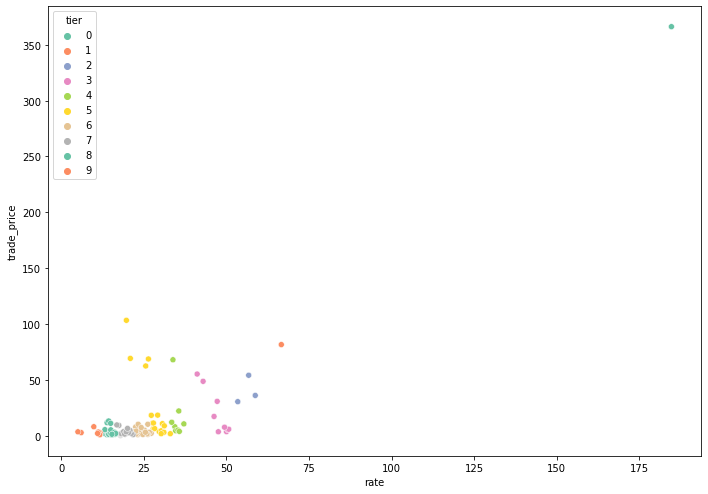

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(ax=ax,x='rate', y='trade_price', hue='tier', data=df_tier, palette="Set2")

In [12]:
from IPython.core.display import display, HTML
from copy import deepcopy

def makeTierMark(x):
    return '<img src= ' + 'static/image/icon-champtier-'+str(x)+'.png' + ' width=22 height=24>'

def makeHTML(feature_df) :    
    feature_df = deepcopy(feature_df)
    feature_df=feature_df.astype(str)
    #feature_df['img'] = 'https://ssl.pstatic.net/imgfinance/chart/mobile/candle/day/'+feature_df['단축코드']+'_end.png'
    #feature_df['img'] = '<img src = \'' + feature_df['img'] + '\' weight=300 height=200>'
    
    feature_df['티어'] =feature_df['티어'].map(lambda x : makeTierMark(x))

    for index,column in enumerate(feature_df.columns):
        feature_df[column] = 'col'+str(index+1)+feature_df[column]
    
    feature_df.columns = ['1 코인','2 상승률','3 거래액(억)','4 티어']

    f=open('./server/static/header.txt', 'r')
    header = f.read()

    f=open('./server/static/js.txt', 'r')
    js = f.read()

    df_html = feature_df.to_html(escape=False)

    df_html = header + df_html + js

    return df_html

In [13]:
df_tier = df_tier.drop('tier_val',axis=1)
df_tier = df_tier.reset_index()
df_tier_view = df_tier[['name','rate','trade_price','tier']]

In [14]:
df_tier_view['rate'] = df_tier_view['rate'].map(lambda x : round(x,2))
df_tier_view['trade_price'] = df_tier_view['trade_price'].map(lambda x : round(x,2))
df_tier_view.columns = ['코인','등락률','거래액(억)','티어']
html = makeHTML(df_tier_view[:20])
html = html.replace('<table border=\"1\" class=\"dataframe\">','<table>')
html=html.replace('<tr','<tr class=\"row100 body\"')

for index,column in enumerate(df_tier.columns):
    html=html.replace('<td>col'+str(index+1),'<td class=\"cell100 column'+str(index+1)+'\">')
    html=html.replace('<th>'+str(index+1)+' ','<th class=\"cell100 column'+str(index+1)+'\">')
HTML(html)

,코인,상승률,거래액(억),티어
0,엑시인피니티,184.68,366.16,
1,샌드박스,66.6,81.67,
2,던프로토콜,58.71,36.17,
3,스트라이크,56.72,54.24,
4,가스,53.42,30.61,
5,어거,41.13,55.32,
6,플로우,42.93,48.79,
7,폴리매쓰,47.54,3.66,
8,톤,46.24,17.36,
9,알파쿼크,47.19,30.87,


In [15]:
with open('./server/templates/coin_tier.html', 'w',encoding='utf-8') as f:
    f.write(html)

In [19]:
df_json = df_tier[['name','alias','rate','trade_price','tier']]
df_json_rank = df_json.reset_index()
df_json_rank.columns = ['rank','name','alias','rise','volume','tier']
df_json_rank['rank']+=1
df_json_rank = df_json_rank[['name','alias','rise','volume','rank','tier']]
df_json_rank

,name,alias,rise,volume,rank,tier
0,엑시인피니티,AXS,184.680401,366.163767,1,0
1,샌드박스,SAND,66.597077,81.665778,2,1
2,던프로토콜,DAWN,58.709677,36.170386,3,2
3,스트라이크,STRK,56.720827,54.237704,4,2
4,가스,GAS,53.422502,30.605375,5,2
...,...,...,...,...,...,...
97,파워렛저,POWR,11.650485,0.993139,98,9
98,캐리프로토콜,CRE,11.209068,3.416233,99,9
99,리퍼리움,RFR,10.998991,2.191732,100,9
100,칠리즈,CHZ,9.848485,8.163187,101,9


In [20]:
json_list = []
for i in range(len(df_json_rank)):
    json_list.append(df_json_rank.iloc[i].to_json(force_ascii=False))
json_list[:3]

['{"name":"엑시인피니티","alias":"AXS","rise":184.6804014791,"volume":366.1637670423,"rank":1,"tier":0}',
 '{"name":"샌드박스","alias":"SAND","rise":66.5970772443,"volume":81.6657783631,"rank":2,"tier":1}',
 '{"name":"던프로토콜","alias":"DAWN","rise":58.7096774194,"volume":36.1703863709,"rank":3,"tier":2}']

In [21]:
import json
with open('./tier_data/coin_tier.json', 'w', encoding='utf-8') as f:
    df_json_rank.to_json(f, force_ascii=False,orient='records')